<a href="https://colab.research.google.com/github/MatheusAnjoss/CRUD-Alphacode/blob/main/Gelateria_Numera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estatísticas descritivas dos dados dos clientes:
          Unnamed: 0 genero         idade                                id  \
count   17000.000000  14825  17000.000000                             17000   
unique           NaN      3           NaN                             17000   
top              NaN      M           NaN  68be06ca386d4c31939f3a4f0e3dd783   
freq             NaN   8484           NaN                                 1   
mean     8500.500000    NaN     62.531412                               NaN   
min         1.000000    NaN     18.000000                               NaN   
25%      4250.750000    NaN     45.000000                               NaN   
50%      8500.500000    NaN     58.000000                               NaN   
75%     12750.250000    NaN     73.000000                               NaN   
max     17000.000000    NaN    118.000000                               NaN   
std      4907.621624    NaN     26.738580                               NaN   

  

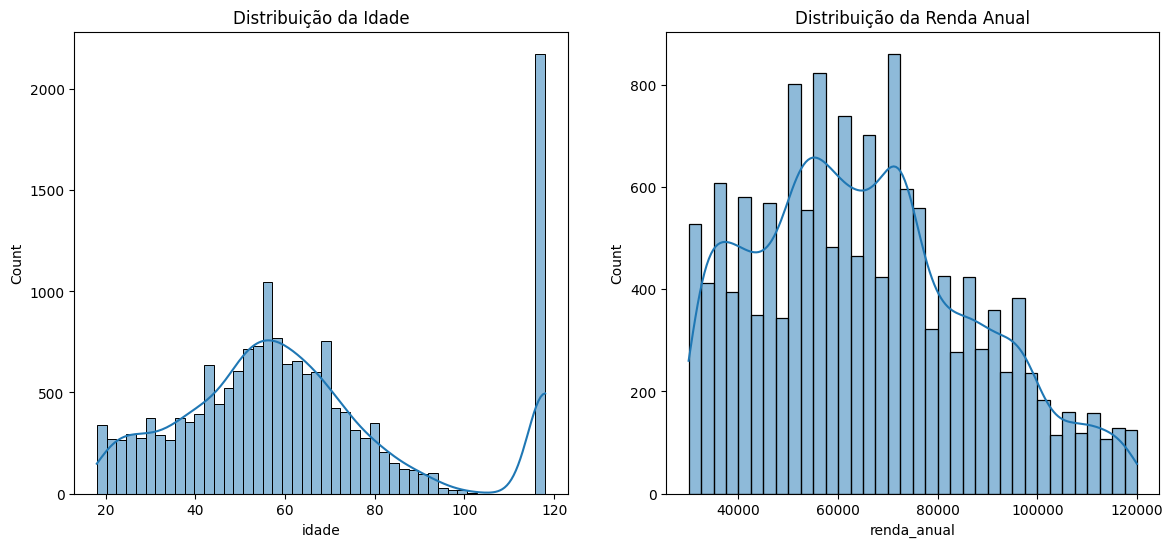

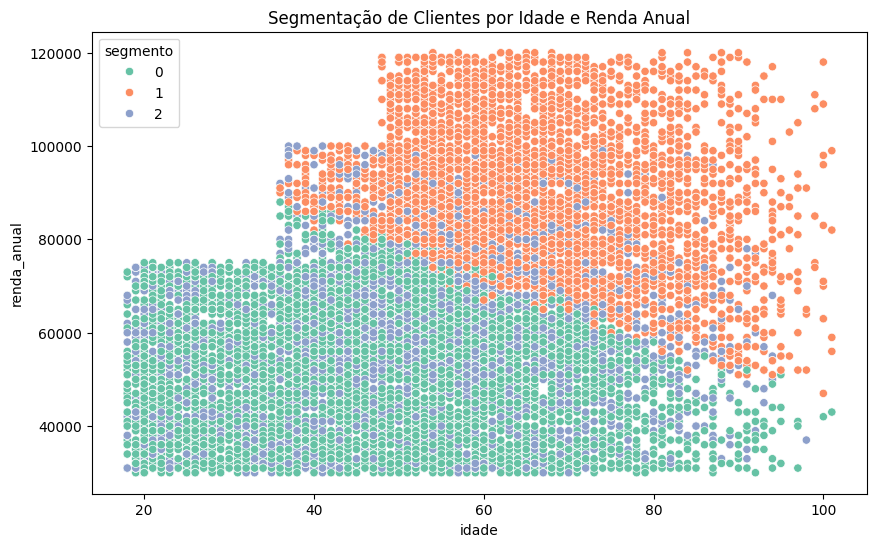

{1: 'Ofertas de desconto em produtos premium e canais personalizados', 0: 'Ofertas de desconto em produtos premium e canais personalizados', 2: 'Ofertas de desconto em produtos premium e canais personalizados'}


In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

def carregar_dados():
    portfolio_ofertas = pd.read_csv('portfolio_ofertas.csv', encoding='latin1')
    clientes = pd.read_csv('dados_clientes.csv', encoding='latin1')
    eventos = pd.read_csv('eventos_ofertas.csv', encoding='latin1')

    clientes['membro_desde'] = pd.to_datetime(clientes['membro_desde'], format='%Y%m%d')
    portfolio_ofertas['canal'] = portfolio_ofertas['canal'].apply(eval)

    return portfolio_ofertas, clientes, eventos

def analise_dados(clientes):
    print("Estatísticas descritivas dos dados dos clientes:")
    print(clientes.describe(include='all'))

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(clientes['idade'].dropna(), kde=True)
    plt.title('Distribuição da Idade')

    plt.subplot(1, 2, 2)
    sns.histplot(clientes['renda_anual'].dropna(), kde=True)
    plt.title('Distribuição da Renda Anual')

    plt.show()

def segmentar_clientes(clientes):
    clientes_segmentacao = clientes[['idade', 'renda_anual']].copy()
    clientes_segmentacao['tempo_como_cliente'] = (pd.Timestamp('now') - clientes['membro_desde']).dt.days

    if clientes_segmentacao.isnull().sum().sum() > 0:
        clientes_segmentacao.fillna(clientes_segmentacao.mean(), inplace=True)

    scaler = StandardScaler()
    clientes_scaled = scaler.fit_transform(clientes_segmentacao)

    kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
    clientes['segmento'] = kmeans.fit_predict(clientes_scaled)

    return clientes

def visualizar_segmentos(clientes):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='idade', y='renda_anual', hue='segmento', data=clientes, palette='Set2')
    plt.title('Segmentação de Clientes por Idade e Renda Anual')
    plt.show()

def recomendacao_estrategia(clientes, portfolio_ofertas):
    segmentos = clientes['segmento'].unique()
    recomendacoes = {}

    for segmento in segmentos:
        clientes_segmento = clientes[clientes['segmento'] == segmento]
        if clientes_segmento['renda_anual'].mean() > 50000:
            recomendacao = 'Ofertas de desconto em produtos premium e canais personalizados'
        elif clientes_segmento['idade'].mean() < 30:
            recomendacao = 'Ofertas de compre 1, leve 2 com foco em redes sociais e mobile'
        else:
            recomendacao = 'Informativos e promoções com foco em e-mail e web'

        recomendacoes[segmento] = recomendacao

    return recomendacoes

portfolio_ofertas, clientes, eventos = carregar_dados()
analise_dados(clientes)
clientes_segmentados = segmentar_clientes(clientes)
visualizar_segmentos(clientes_segmentados)
recomendacoes = recomendacao_estrategia(clientes_segmentados, portfolio_ofertas)
print(recomendacoes)